# Computer Vision CSCI-GA.2272-001 Assignment 1

## Introduction

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used: 
- MNIST digits [handwritten digits]
- CIFAR-10 [32x32 resolution color images of 10 object classes].

## Requirements

You should perform this assignment in PyTorch, modify this ipython notebook

To install PyTorch, follow instructions at http://pytorch.org/

Please submit your assignment by uploading this iPython notebook to NYU classes.

## Warmup [10%]

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand.

MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. 

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes
(airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). 
The train/test split is 50k/10k.

Use `matplotlib` and ipython notebook's visualization capabilities to display some of these images.
[See this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for hints on how to achieve this.

** Relevant Cell: "Data Loading" **

## Training a Single Layer Network on MNIST [20%]

Start by running the training on MNIST.
By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model train it on the 50,000 MNIST training images for 10 epochs (passes through the training data). 

The loss function [cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`.

The default values for the learning rate, batch size and number of epochs are given in the "options" cell of this notebook. 
Unless otherwise specified, use the default values throughout this assignment. 

Note the decrease in training loss and corresponding decrease in validation errors.

Paste the output into your report.
(a): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. Grab a screenshot of the figure and include it in your report. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

(b): Reduce the number of training examples to just 50. [Hint: limit the iterator in the `train` function]. 
Paste the output into your report and explain what is happening to the model.

## Training a Multi-Layer Network on MNIST [20%]

- Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class]. Train the model for 10 epochs and save the output into your report.
-  Now set the learning rate to 10 and observe what happens during training. Save the output in your report and give a brief explanation

## Training a Convolutional Network on CIFAR [50%]

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling.
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling.
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

Train it for 20 epochs on the CIFAR-10 training set and copy the output
into your report, along with a image of the first layer filters.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist)

- Give a breakdown of the parameters within the above model, and the overall number.

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torchvision import datasets, transforms
from torch.autograd import Variable

In [ ]:
# options
dataset = "mnist"
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

# Warmup



In [ ]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# load MNIST Dataset
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
trainset_MNIST = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
testset_MNIST = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

train_loader_MNIST = torch.utils.data.DataLoader(trainset_MNIST, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader_MNIST  = torch.utils.data.DataLoader(testset_MNIST, batch_size=batch_size, shuffle=False, num_workers=0)

# load CIFAR10 Dataset
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
trainset_CIFAR10 = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
testset_CIFAR10 = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader_CIFAR10 = torch.utils.data.DataLoader(trainset_CIFAR10, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader_CIFAR10  = torch.utils.data.DataLoader(testset_CIFAR10, batch_size=batch_size, shuffle=False, num_workers=0)

# get some random training images in MNIST
dataiter = iter(train_loader_MNIST)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))


# get some random training images in CIFAR10
dataiter = iter(train_loader_CIFAR10)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# Training a Single Layer Network on MNIST

## (a) Entire Dataset

In [ ]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
    train_loader = train_loader_MNIST
    test_loader = test_loader_MNIST
elif dataset == 'cifar10':
    num_inputs = 3072
    train_loader = train_loader_CIFAR10
    test_loader = test_loader_CIFAR10

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [ ]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))




In [ ]:
for epoch in range(1, epochs + 1):
    train(epoch)
    if epoch == epochs:
        for m in network.modules():
            if isinstance(m, nn.Linear):
                weight = m.weight.data.view(-1,28,28).numpy()
                num_rows = 2
                num_cols = 5
                fig = plt.figure(figsize=(num_cols,num_rows))
                for i in range(10):
                    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
                    ax1.imshow(weight[i])
                    ax1.axis('off')
                    ax1.set_xticklabels([])
                    ax1.set_yticklabels([])

                plt.subplots_adjust(wspace=0.1, hspace=0.1)
                plt.show()
    test()


## (b) 50 Train Samples

In [ ]:
batch_size = 1

train_loader_MNIST_50 = torch.utils.data.DataLoader(trainset_MNIST, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader_MNIST_50  = torch.utils.data.DataLoader(testset_MNIST, batch_size=batch_size, shuffle=False, num_workers=0)

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

subset_data = []
subset_target = []

for batch_idx, (data, target) in enumerate(train_loader_MNIST_50):
    if batch_idx<50:
        subset_data.append(data)
        subset_target.append(target)

def train_50(epoch):
    network.train()
    for i in range(50):
        data = subset_data[i]
        target = subset_target[i]
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if i == 49:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, 50, len(train_loader.dataset),
                5. * i / len(train_loader), loss.item()))
            break
            
def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader_MNIST_50:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
          
        
for epoch in range(1, epochs + 1):
    train_50(epoch)
    test()

# Training a Multi-Layer Network on MNIST
## (a) Learning rate = 0.01

In [ ]:
batch_size = 64

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.hidden = nn.Linear(num_inputs, 1000)
        self.predict = nn.Linear(1000, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = torch.tanh(self.hidden(input))
        output = self.predict(output)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

## (a) Learning rate = 10

In [ ]:
lr = 10

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

for epoch in range(1, epochs + 1):
    train(epoch)
    test()

# Training a Convolutional Network on CIFAR
- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling.
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling.
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

In [ ]:
from sklearn import preprocessing

batch_size = 64
lr = 0.01
epochs = 20 
num_inputs = 3072
train_loader = train_loader_CIFAR10
test_loader = test_loader_CIFAR10

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.conv_1 = nn.Conv2d(3, 16, 5)
        self.pool_1 = nn.MaxPool2d(2, 2)
        self.conv_2 = nn.Conv2d(16, 128, 5)
        self.pool_2 = nn.MaxPool2d(2, 2)
        self.linear = nn.Linear(3200, 64)
        self.predict = nn.Linear(64, num_outputs)

    def forward(self, input):
        output = torch.tanh(self.conv_1(input))
        output = self.pool_1(output)
        output = torch.tanh(self.conv_2(output))
        output = self.pool_2(output)
        output = output.view(batch_size, -1)
        output = torch.tanh(self.linear(output))
        output = self.predict(output)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)


def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if data.size()[0] == 64:
            data, target = Variable(data), Variable(target)
            optimizer.zero_grad()
            output = network(data)
            loss = F.cross_entropy(output, target)
            loss.backward()
            optimizer.step()
            if batch_idx % 100 == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        if data.size()[0] == 64:
            output = network(data)
            test_loss += F.cross_entropy(output, target, size_average=False).item() # sum up batch loss
            pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

for epoch in range(1, epochs + 1):
    train(epoch)
    if epoch == epochs:
        for m in network.modules():
                if isinstance(m, nn.Conv2d):
                    weight = m.weight.data.view(16,-1).numpy()
                    min_max_scaler = preprocessing.MinMaxScaler()
                    weight = min_max_scaler.fit_transform(weight)
                    weight = weight.reshape((16,5,5,3))
                    num_rows = 4
                    num_cols = 4
                    fig = plt.figure(figsize=(num_cols,num_rows))
                    for i in range(16):
                        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
                        ax1.imshow(weight[i])
                        ax1.axis('off')
                        ax1.set_xticklabels([])
                        ax1.set_yticklabels([])

                    plt.subplots_adjust(wspace=0.1, hspace=0.1)
                    plt.show()
                    break;
    test()

ASSIGNMENT ONE REPORT
==========================
## 1. Dataset Visualization
### (a) MNIST
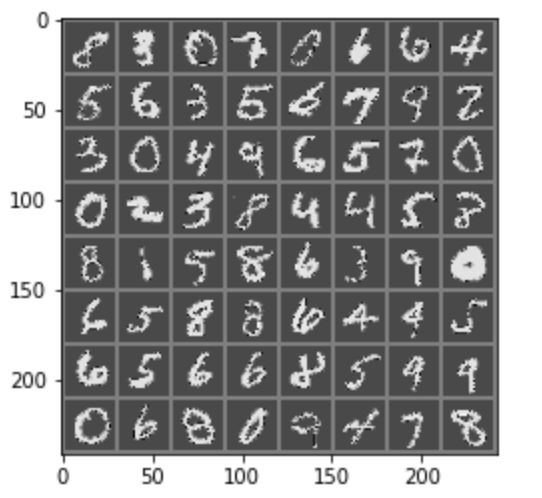
### (b) CIFAR10
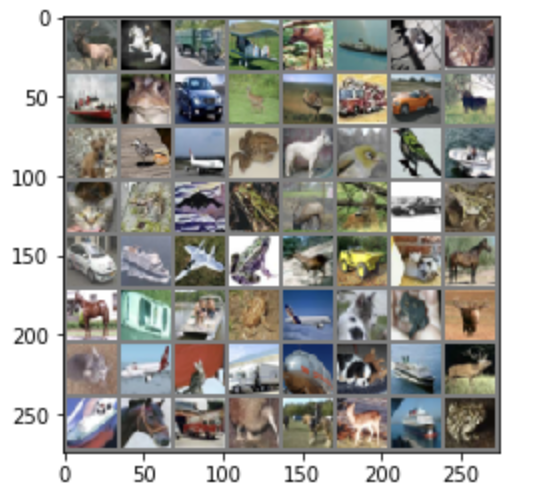

## 2. Training a Single Layer Network on MNIST
## (a) Output

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.167429

Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.243454

Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.264548

Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.302391

Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.185282

Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.320880

Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.389538

Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.182401

Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.158853

Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.254011

**Test set: Average loss: 0.2723, Accuracy: 9214/10000 (92%)**

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.386593

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.150043

Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.204537

Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.147855

Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.276242

Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.323056

Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.266955

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.195755

Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.321990

Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.231044

**Test set: Average loss: 0.2731, Accuracy: 9238/10000 (92%)**

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.391283

Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.221405

Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.550556

Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.418365

Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.552499

Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.398457

Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.173918

Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.405959

Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.205319

Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.271675

**Test set: Average loss: 0.2731, Accuracy: 9213/10000 (92%)**

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.231299

Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.390386

Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.204613

Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.281957

Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.092263

Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.136486

Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.087186

Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.469824

Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.370860

Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.425210

**Test set: Average loss: 0.2711, Accuracy: 9223/10000 (92%)**

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.230442

Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.334453

Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.232133

Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.393959

Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.295594

Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.372772

Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.237078

Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.353942

Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.172875

Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.210338

**Test set: Average loss: 0.2711, Accuracy: 9250/10000 (92%)**

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.071538

Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.285812

Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.194717

Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.144414

Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.165811

Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.370526

Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.408187

Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.299799

Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.100501

Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.414114

**Test set: Average loss: 0.2696, Accuracy: 9240/10000 (92%)**

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.659887

Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.185052

Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.335862

Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.210227

Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.170516

Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.106875

Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.366651

Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.104455

Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.174060

Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.246806

**Test set: Average loss: 0.2715, Accuracy: 9236/10000 (92%)**

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.291445

Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.340681

Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.363246

Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.454616

Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.256013

Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.209650

Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.131530

Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.190509

Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.234950

Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.201278

**Test set: Average loss: 0.2707, Accuracy: 9223/10000 (92%)**

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.203364

Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.363148

Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.258518

Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.327720

Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.202231

Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.300947

Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.330894

Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.136243

Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.127455

Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.226993

**Test set: Average loss: 0.2708, Accuracy: 9242/10000 (92%)**

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.187862

Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.216768

Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.180796

Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.368527

Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.162535

Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.174841

Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.367192

Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.348531

Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.367087

Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.079516

**Test set: Average loss: 0.2692, Accuracy: 9245/10000 (92%)**

## (b) Weight Visualization

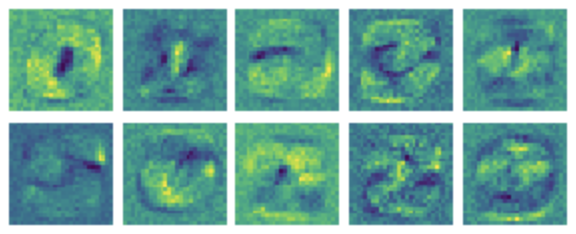

## (c) 50 Train Examples
### -- Output

Train Epoch: 1 [50/60000 (0%)]	Loss: 0.759014

**Test set: Average loss: 1.5327, Accuracy: 5247/10000 (52%)**

Train Epoch: 2 [50/60000 (0%)]	Loss: 0.007388

**Test set: Average loss: 1.2218, Accuracy: 6082/10000 (60%)**

Train Epoch: 3 [50/60000 (0%)]	Loss: 0.004353

**Test set: Average loss: 1.1838, Accuracy: 6275/10000 (62%)**

Train Epoch: 4 [50/60000 (0%)]	Loss: 0.003650

**Test set: Average loss: 1.1838, Accuracy: 6303/10000 (63%)**

Train Epoch: 5 [50/60000 (0%)]	Loss: 0.003236

**Test set: Average loss: 1.1854, Accuracy: 6312/10000 (63%)**

Train Epoch: 6 [50/60000 (0%)]	Loss: 0.002961

**Test set: Average loss: 1.1872, Accuracy: 6321/10000 (63%)**

Train Epoch: 7 [50/60000 (0%)]	Loss: 0.002758

**Test set: Average loss: 1.1891, Accuracy: 6328/10000 (63%)**

Train Epoch: 8 [50/60000 (0%)]	Loss: 0.002599

**Test set: Average loss: 1.1910, Accuracy: 6337/10000 (63%)**

Train Epoch: 9 [50/60000 (0%)]	Loss: 0.002469

**Test set: Average loss: 1.1929, Accuracy: 6337/10000 (63%)**

Train Epoch: 10 [50/60000 (0%)]	Loss: 0.002359

**Test set: Average loss: 1.1948, Accuracy: 6340/10000 (63%)**

### -- Discussion

When we use the entire dataset to train the model, the test accuracy is 92%. However, after we setting the amount of training samples to 50, there is a significant decrease in test accuracy, it's only 63% after 10 epochs. 

Obviously, the model is overfitted. During training time, the model could only learn from 50 samples which contain limited informaion and variance to make the model generalize well from training data to unseen data.


## 2. Training a Multi-Layer Network on MNIST
## (a) Learning rate = 0.01

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.369158

Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.584835

Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.459316

Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.565438

Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.513206

Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.345016

Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.269000

Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.278388

Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.417657

Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.264459

**Test set: Average loss: 0.3242, Accuracy: 9090/10000 (90%)**

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.248622

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.447027

Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.389038

Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.197712

Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.431442

Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.273344

Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.258399

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.429674

Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.119763

Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.300107

**Test set: Average loss: 0.2819, Accuracy: 9205/10000 (92%)**

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.195883

Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.282103

Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.334541

Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.314052

Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.328057

Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.289297

Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.227510

Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.295838

Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.253992

Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.375452

**Test set: Average loss: 0.2605, Accuracy: 9285/10000 (92%)**

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.135808

Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.198350

Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.231882

Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.410229

Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.646949

Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.360067

Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.184223

Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.285675

Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.344999

Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.133983

**Test set: Average loss: 0.2415, Accuracy: 9312/10000 (93%)**

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.142866

Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.319823

Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.105619

Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.198016

Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.322322

Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.205354

Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.073116

Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.532988

Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.091088

Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.127188

**Test set: Average loss: 0.2280, Accuracy: 9370/10000 (93%)**

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.211651

Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.163575

Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.073038

Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.469557

Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.218791

Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.215333

Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.208154

Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.175058

Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.278938

Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.287737

**Test set: Average loss: 0.2128, Accuracy: 9389/10000 (93%)**

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.284095

Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.165659

Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.286745

Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.161218

Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.307026

Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.121937

Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.067368

Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.203002

Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.281378

Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.118008

**Test set: Average loss: 0.1995, Accuracy: 9437/10000 (94%)**

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.151067

Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.244960

Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.170747

Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.234983

Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.159417

Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.153368

Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.151399

Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.184739

Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.207058

Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.161311

**Test set: Average loss: 0.1860, Accuracy: 9477/10000 (94%)**

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.208595

Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.151183

Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.332824

Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.214494

Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.225003

Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.179698

Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.241566

Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.145416

Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.092547

Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.484790

**Test set: Average loss: 0.1742, Accuracy: 9492/10000 (94%)**

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.333839

Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.106116

Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.103459

Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.165568

Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.184089

Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.217701

Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.163116

Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.169023

Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.233791

Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.365961

**Test set: Average loss: 0.1637, Accuracy: 9542/10000 (95%)**

### (b) Learing rate = 10

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.270303

Train Epoch: 1 [6400/60000 (11%)]	Loss: 1500.705444

Train Epoch: 1 [12800/60000 (21%)]	Loss: 1320.472900

Train Epoch: 1 [19200/60000 (32%)]	Loss: 728.542297

Train Epoch: 1 [25600/60000 (43%)]	Loss: 515.123840

Train Epoch: 1 [32000/60000 (53%)]	Loss: 236.051346

Train Epoch: 1 [38400/60000 (64%)]	Loss: 274.408813

Train Epoch: 1 [44800/60000 (75%)]	Loss: 420.852234

Train Epoch: 1 [51200/60000 (85%)]	Loss: 640.967224

Train Epoch: 1 [57600/60000 (96%)]	Loss: 222.647827

**Test set: Average loss: 560.7601, Accuracy: 5001/10000 (50%)**

Train Epoch: 2 [0/60000 (0%)]	Loss: 725.075623

Train Epoch: 2 [6400/60000 (11%)]	Loss: 217.767685

Train Epoch: 2 [12800/60000 (21%)]	Loss: 401.565186

Train Epoch: 2 [19200/60000 (32%)]	Loss: 308.585297

Train Epoch: 2 [25600/60000 (43%)]	Loss: 459.974030

Train Epoch: 2 [32000/60000 (53%)]	Loss: 158.518661

Train Epoch: 2 [38400/60000 (64%)]	Loss: 109.192162

Train Epoch: 2 [44800/60000 (75%)]	Loss: 464.112823

Train Epoch: 2 [51200/60000 (85%)]	Loss: 300.152832

Train Epoch: 2 [57600/60000 (96%)]	Loss: 252.970535

**Test set: Average loss: 429.8876, Accuracy: 5401/10000 (54%)**

Train Epoch: 3 [0/60000 (0%)]	Loss: 376.685272

Train Epoch: 3 [6400/60000 (11%)]	Loss: 148.338928

Train Epoch: 3 [12800/60000 (21%)]	Loss: 138.873672

Train Epoch: 3 [19200/60000 (32%)]	Loss: 332.638855

Train Epoch: 3 [25600/60000 (43%)]	Loss: 320.434570

Train Epoch: 3 [32000/60000 (53%)]	Loss: 593.937134

Train Epoch: 3 [38400/60000 (64%)]	Loss: 175.728897

Train Epoch: 3 [44800/60000 (75%)]	Loss: 409.630768

Train Epoch: 3 [51200/60000 (85%)]	Loss: 297.314819

Train Epoch: 3 [57600/60000 (96%)]	Loss: 258.101593

**Test set: Average loss: 882.6311, Accuracy: 3293/10000 (32%)**

Train Epoch: 4 [0/60000 (0%)]	Loss: 722.894653

Train Epoch: 4 [6400/60000 (11%)]	Loss: 180.650162

Train Epoch: 4 [12800/60000 (21%)]	Loss: 146.621201

Train Epoch: 4 [19200/60000 (32%)]	Loss: 167.291595

Train Epoch: 4 [25600/60000 (43%)]	Loss: 217.567947

Train Epoch: 4 [32000/60000 (53%)]	Loss: 403.859253

Train Epoch: 4 [38400/60000 (64%)]	Loss: 132.851654

Train Epoch: 4 [44800/60000 (75%)]	Loss: 405.223480

Train Epoch: 4 [51200/60000 (85%)]	Loss: 412.594971

Train Epoch: 4 [57600/60000 (96%)]	Loss: 421.968140

**Test set: Average loss: 343.4630, Accuracy: 6231/10000 (62%)**

Train Epoch: 5 [0/60000 (0%)]	Loss: 365.384216

Train Epoch: 5 [6400/60000 (11%)]	Loss: 528.394775

Train Epoch: 5 [12800/60000 (21%)]	Loss: 178.077667

Train Epoch: 5 [19200/60000 (32%)]	Loss: 401.838013

Train Epoch: 5 [25600/60000 (43%)]	Loss: 261.898895

Train Epoch: 5 [32000/60000 (53%)]	Loss: 299.206207

Train Epoch: 5 [38400/60000 (64%)]	Loss: 184.764130

Train Epoch: 5 [44800/60000 (75%)]	Loss: 383.508759

Train Epoch: 5 [51200/60000 (85%)]	Loss: 257.865875

Train Epoch: 5 [57600/60000 (96%)]	Loss: 287.520142

**Test set: Average loss: 572.0521, Accuracy: 6382/10000 (63%)**

Train Epoch: 6 [0/60000 (0%)]	Loss: 768.385803

Train Epoch: 6 [6400/60000 (11%)]	Loss: 92.434311

Train Epoch: 6 [12800/60000 (21%)]	Loss: 155.741379

Train Epoch: 6 [19200/60000 (32%)]	Loss: 91.046204

Train Epoch: 6 [25600/60000 (43%)]	Loss: 114.998009

Train Epoch: 6 [32000/60000 (53%)]	Loss: 204.943176

Train Epoch: 6 [38400/60000 (64%)]	Loss: 197.312134

Train Epoch: 6 [44800/60000 (75%)]	Loss: 278.862183

Train Epoch: 6 [51200/60000 (85%)]	Loss: 385.835938

Train Epoch: 6 [57600/60000 (96%)]	Loss: 182.025177

**Test set: Average loss: 491.1018, Accuracy: 4837/10000 (48%)**

Train Epoch: 7 [0/60000 (0%)]	Loss: 566.586487

Train Epoch: 7 [6400/60000 (11%)]	Loss: 348.011414

Train Epoch: 7 [12800/60000 (21%)]	Loss: 61.525673

Train Epoch: 7 [19200/60000 (32%)]	Loss: 262.074341

Train Epoch: 7 [25600/60000 (43%)]	Loss: 96.170456

Train Epoch: 7 [32000/60000 (53%)]	Loss: 609.364197

Train Epoch: 7 [38400/60000 (64%)]	Loss: 241.625595

Train Epoch: 7 [44800/60000 (75%)]	Loss: 151.248337

Train Epoch: 7 [51200/60000 (85%)]	Loss: 293.234009

Train Epoch: 7 [57600/60000 (96%)]	Loss: 261.492584

**Test set: Average loss: 213.1635, Accuracy: 6910/10000 (69%)**

Train Epoch: 8 [0/60000 (0%)]	Loss: 258.939453

Train Epoch: 8 [6400/60000 (11%)]	Loss: 496.691498

Train Epoch: 8 [12800/60000 (21%)]	Loss: 328.061981

Train Epoch: 8 [19200/60000 (32%)]	Loss: 246.259567

Train Epoch: 8 [25600/60000 (43%)]	Loss: 238.171661

Train Epoch: 8 [32000/60000 (53%)]	Loss: 235.420517

Train Epoch: 8 [38400/60000 (64%)]	Loss: 138.521881

Train Epoch: 8 [44800/60000 (75%)]	Loss: 180.994583

Train Epoch: 8 [51200/60000 (85%)]	Loss: 364.543884

Train Epoch: 8 [57600/60000 (96%)]	Loss: 167.695587

**Test set: Average loss: 463.3563, Accuracy: 5630/10000 (56%)**

Train Epoch: 9 [0/60000 (0%)]	Loss: 550.271912

Train Epoch: 9 [6400/60000 (11%)]	Loss: 288.884277

Train Epoch: 9 [12800/60000 (21%)]	Loss: 139.053085

Train Epoch: 9 [19200/60000 (32%)]	Loss: 207.115021

Train Epoch: 9 [25600/60000 (43%)]	Loss: 414.865906

Train Epoch: 9 [32000/60000 (53%)]	Loss: 196.253082

Train Epoch: 9 [38400/60000 (64%)]	Loss: 112.130630

Train Epoch: 9 [44800/60000 (75%)]	Loss: 137.187592

Train Epoch: 9 [51200/60000 (85%)]	Loss: 259.856689

Train Epoch: 9 [57600/60000 (96%)]	Loss: 318.174957

**Test set: Average loss: 188.4861, Accuracy: 6643/10000 (66%)**

Train Epoch: 10 [0/60000 (0%)]	Loss: 216.348907

Train Epoch: 10 [6400/60000 (11%)]	Loss: 313.297272

Train Epoch: 10 [12800/60000 (21%)]	Loss: 136.761353

Train Epoch: 10 [19200/60000 (32%)]	Loss: 466.745148

Train Epoch: 10 [25600/60000 (43%)]	Loss: 141.041595

Train Epoch: 10 [32000/60000 (53%)]	Loss: 432.186371

Train Epoch: 10 [38400/60000 (64%)]	Loss: 72.284698

Train Epoch: 10 [44800/60000 (75%)]	Loss: 355.306580

Train Epoch: 10 [51200/60000 (85%)]	Loss: 134.504639

Train Epoch: 10 [57600/60000 (96%)]	Loss: 115.598640

**Test set: Average loss: 134.8967, Accuracy: 7142/10000 (71%)**

### (c) Discussion

During training, the values of loss show oscillations and the test accuracy is only 71% which is much lower than the case when using the learning rate of 0.01. It is because the learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. If the value is too large may result in learning a sub-optimal set of weights too fast or an unstable training process.

## 3. Training a Convolutional Network on CIFAR
### (a) Output

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.309662

Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.180781

Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.008339

Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.989309

Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.877900

Train Epoch: 1 [32000/50000 (64%)]	Loss: 2.008835

Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.737528

Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.784065

**Test set: Average loss: 1.7717, Accuracy: 3751/10000 (37%)**

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.519971

Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.772013

Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.682543

Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.702607

Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.736965

Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.558699

Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.617064

Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.492357

**Test set: Average loss: 1.5895, Accuracy: 4338/10000 (43%)**

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.566050

Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.595570

Train Epoch: 3 [12800/50000 (26%)]	Loss: 1.521232

Train Epoch: 3 [19200/50000 (38%)]	Loss: 1.627216

Train Epoch: 3 [25600/50000 (51%)]	Loss: 1.662626

Train Epoch: 3 [32000/50000 (64%)]	Loss: 1.412862

Train Epoch: 3 [38400/50000 (77%)]	Loss: 1.462097

Train Epoch: 3 [44800/50000 (90%)]	Loss: 1.632856

**Test set: Average loss: 1.4742, Accuracy: 4718/10000 (47%)**

Train Epoch: 4 [0/50000 (0%)]	Loss: 1.584596

Train Epoch: 4 [6400/50000 (13%)]	Loss: 1.525271

Train Epoch: 4 [12800/50000 (26%)]	Loss: 1.561027

Train Epoch: 4 [19200/50000 (38%)]	Loss: 1.238672

Train Epoch: 4 [25600/50000 (51%)]	Loss: 1.389715

Train Epoch: 4 [32000/50000 (64%)]	Loss: 1.295713

Train Epoch: 4 [38400/50000 (77%)]	Loss: 1.248319

Train Epoch: 4 [44800/50000 (90%)]	Loss: 1.559796

**Test set: Average loss: 1.3906, Accuracy: 4998/10000 (49%)**

Train Epoch: 5 [0/50000 (0%)]	Loss: 1.449474

Train Epoch: 5 [6400/50000 (13%)]	Loss: 1.297790

Train Epoch: 5 [12800/50000 (26%)]	Loss: 1.346708

Train Epoch: 5 [19200/50000 (38%)]	Loss: 1.391705

Train Epoch: 5 [25600/50000 (51%)]	Loss: 1.432373

Train Epoch: 5 [32000/50000 (64%)]	Loss: 1.195218

Train Epoch: 5 [38400/50000 (77%)]	Loss: 1.291129

Train Epoch: 5 [44800/50000 (90%)]	Loss: 1.290181

**Test set: Average loss: 1.3461, Accuracy: 5152/10000 (51%)**

Train Epoch: 6 [0/50000 (0%)]	Loss: 1.232343

Train Epoch: 6 [6400/50000 (13%)]	Loss: 1.193619

Train Epoch: 6 [12800/50000 (26%)]	Loss: 1.559813

Train Epoch: 6 [19200/50000 (38%)]	Loss: 1.183432

Train Epoch: 6 [25600/50000 (51%)]	Loss: 1.438661

Train Epoch: 6 [32000/50000 (64%)]	Loss: 1.155511

Train Epoch: 6 [38400/50000 (77%)]	Loss: 1.172907

Train Epoch: 6 [44800/50000 (90%)]	Loss: 1.388604

**Test set: Average loss: 1.2896, Accuracy: 5406/10000 (54%)**

Train Epoch: 7 [0/50000 (0%)]	Loss: 1.235363

Train Epoch: 7 [6400/50000 (13%)]	Loss: 1.289639

Train Epoch: 7 [12800/50000 (26%)]	Loss: 1.144272

Train Epoch: 7 [19200/50000 (38%)]	Loss: 1.343506

Train Epoch: 7 [25600/50000 (51%)]	Loss: 1.296352

Train Epoch: 7 [32000/50000 (64%)]	Loss: 1.213072

Train Epoch: 7 [38400/50000 (77%)]	Loss: 1.113572

Train Epoch: 7 [44800/50000 (90%)]	Loss: 1.065300

**Test set: Average loss: 1.2373, Accuracy: 5554/10000 (55%)**

Train Epoch: 8 [0/50000 (0%)]	Loss: 1.026266

Train Epoch: 8 [6400/50000 (13%)]	Loss: 1.219749

Train Epoch: 8 [12800/50000 (26%)]	Loss: 1.225828

Train Epoch: 8 [19200/50000 (38%)]	Loss: 1.175712

Train Epoch: 8 [25600/50000 (51%)]	Loss: 1.246823

Train Epoch: 8 [32000/50000 (64%)]	Loss: 1.185141

Train Epoch: 8 [38400/50000 (77%)]	Loss: 1.124149

Train Epoch: 8 [44800/50000 (90%)]	Loss: 1.339668

**Test set: Average loss: 1.1893, Accuracy: 5788/10000 (57%)**

Train Epoch: 9 [0/50000 (0%)]	Loss: 1.256251

Train Epoch: 9 [6400/50000 (13%)]	Loss: 1.102540

Train Epoch: 9 [12800/50000 (26%)]	Loss: 0.996073

Train Epoch: 9 [19200/50000 (38%)]	Loss: 1.068981

Train Epoch: 9 [25600/50000 (51%)]	Loss: 1.082259

Train Epoch: 9 [32000/50000 (64%)]	Loss: 1.331207

Train Epoch: 9 [38400/50000 (77%)]	Loss: 1.293348

Train Epoch: 9 [44800/50000 (90%)]	Loss: 1.084798

**Test set: Average loss: 1.1498, Accuracy: 5896/10000 (58%)**

Train Epoch: 10 [0/50000 (0%)]	Loss: 1.170942

Train Epoch: 10 [6400/50000 (13%)]	Loss: 1.280679

Train Epoch: 10 [12800/50000 (26%)]	Loss: 1.144964

Train Epoch: 10 [19200/50000 (38%)]	Loss: 1.068629

Train Epoch: 10 [25600/50000 (51%)]	Loss: 1.081477

Train Epoch: 10 [32000/50000 (64%)]	Loss: 0.920752

Train Epoch: 10 [38400/50000 (77%)]	Loss: 1.079894

Train Epoch: 10 [44800/50000 (90%)]	Loss: 0.893203

**Test set: Average loss: 1.1593, Accuracy: 5866/10000 (58%)**

Train Epoch: 11 [0/50000 (0%)]	Loss: 1.188360

Train Epoch: 11 [6400/50000 (13%)]	Loss: 1.087553

Train Epoch: 11 [12800/50000 (26%)]	Loss: 1.172208

Train Epoch: 11 [19200/50000 (38%)]	Loss: 0.942726

Train Epoch: 11 [25600/50000 (51%)]	Loss: 1.016647

Train Epoch: 11 [32000/50000 (64%)]	Loss: 1.196599

Train Epoch: 11 [38400/50000 (77%)]	Loss: 1.069629

Train Epoch: 11 [44800/50000 (90%)]	Loss: 0.981995

**Test set: Average loss: 1.0775, Accuracy: 6184/10000 (61%)**

Train Epoch: 12 [0/50000 (0%)]	Loss: 0.969837

Train Epoch: 12 [6400/50000 (13%)]	Loss: 0.920874

Train Epoch: 12 [12800/50000 (26%)]	Loss: 1.106751

Train Epoch: 12 [19200/50000 (38%)]	Loss: 0.835950

Train Epoch: 12 [25600/50000 (51%)]	Loss: 0.868055

Train Epoch: 12 [32000/50000 (64%)]	Loss: 1.310924

Train Epoch: 12 [38400/50000 (77%)]	Loss: 0.952922

Train Epoch: 12 [44800/50000 (90%)]	Loss: 0.860365

**Test set: Average loss: 1.0699, Accuracy: 6245/10000 (62%)**

Train Epoch: 13 [0/50000 (0%)]	Loss: 0.942339

Train Epoch: 13 [6400/50000 (13%)]	Loss: 0.904070

Train Epoch: 13 [12800/50000 (26%)]	Loss: 0.964831

Train Epoch: 13 [19200/50000 (38%)]	Loss: 0.840632

Train Epoch: 13 [25600/50000 (51%)]	Loss: 1.073103

Train Epoch: 13 [32000/50000 (64%)]	Loss: 0.972184

Train Epoch: 13 [38400/50000 (77%)]	Loss: 1.161688

Train Epoch: 13 [44800/50000 (90%)]	Loss: 0.891907

**Test set: Average loss: 1.0395, Accuracy: 6328/10000 (63%)**

Train Epoch: 14 [0/50000 (0%)]	Loss: 0.767784

Train Epoch: 14 [6400/50000 (13%)]	Loss: 0.989296

Train Epoch: 14 [12800/50000 (26%)]	Loss: 0.918562

Train Epoch: 14 [19200/50000 (38%)]	Loss: 0.945249

Train Epoch: 14 [25600/50000 (51%)]	Loss: 0.850050

Train Epoch: 14 [32000/50000 (64%)]	Loss: 1.070671

Train Epoch: 14 [38400/50000 (77%)]	Loss: 1.098842

Train Epoch: 14 [44800/50000 (90%)]	Loss: 0.917175

**Test set: Average loss: 1.0150, Accuracy: 6422/10000 (64%)**

Train Epoch: 15 [0/50000 (0%)]	Loss: 0.802520

Train Epoch: 15 [6400/50000 (13%)]	Loss: 1.120248

Train Epoch: 15 [12800/50000 (26%)]	Loss: 0.654351

Train Epoch: 15 [19200/50000 (38%)]	Loss: 0.873341

Train Epoch: 15 [25600/50000 (51%)]	Loss: 0.943952

Train Epoch: 15 [32000/50000 (64%)]	Loss: 0.980833

Train Epoch: 15 [38400/50000 (77%)]	Loss: 1.090252

Train Epoch: 15 [44800/50000 (90%)]	Loss: 0.813973

**Test set: Average loss: 0.9941, Accuracy: 6507/10000 (65%)**

Train Epoch: 16 [0/50000 (0%)]	Loss: 1.154131

Train Epoch: 16 [6400/50000 (13%)]	Loss: 0.929999

Train Epoch: 16 [12800/50000 (26%)]	Loss: 0.903015

Train Epoch: 16 [19200/50000 (38%)]	Loss: 0.814292

Train Epoch: 16 [25600/50000 (51%)]	Loss: 0.934061

Train Epoch: 16 [32000/50000 (64%)]	Loss: 0.887990

Train Epoch: 16 [38400/50000 (77%)]	Loss: 0.921783

Train Epoch: 16 [44800/50000 (90%)]	Loss: 0.807233

**Test set: Average loss: 0.9896, Accuracy: 6528/10000 (65%)**

Train Epoch: 17 [0/50000 (0%)]	Loss: 0.878233

Train Epoch: 17 [6400/50000 (13%)]	Loss: 0.769422

Train Epoch: 17 [12800/50000 (26%)]	Loss: 1.087088

Train Epoch: 17 [19200/50000 (38%)]	Loss: 0.977929

Train Epoch: 17 [25600/50000 (51%)]	Loss: 0.944021

Train Epoch: 17 [32000/50000 (64%)]	Loss: 0.949261

Train Epoch: 17 [38400/50000 (77%)]	Loss: 0.756418

Train Epoch: 17 [44800/50000 (90%)]	Loss: 0.741120

**Test set: Average loss: 0.9530, Accuracy: 6671/10000 (66%)**

Train Epoch: 18 [0/50000 (0%)]	Loss: 0.628085

Train Epoch: 18 [6400/50000 (13%)]	Loss: 0.953243

Train Epoch: 18 [12800/50000 (26%)]	Loss: 0.821391

Train Epoch: 18 [19200/50000 (38%)]	Loss: 1.060434

Train Epoch: 18 [25600/50000 (51%)]	Loss: 0.971585

Train Epoch: 18 [32000/50000 (64%)]	Loss: 0.858856

Train Epoch: 18 [38400/50000 (77%)]	Loss: 0.744469

Train Epoch: 18 [44800/50000 (90%)]	Loss: 0.751583

**Test set: Average loss: 0.9507, Accuracy: 6647/10000 (66%)**

Train Epoch: 19 [0/50000 (0%)]	Loss: 0.763776

Train Epoch: 19 [6400/50000 (13%)]	Loss: 0.794298

Train Epoch: 19 [12800/50000 (26%)]	Loss: 0.923021

Train Epoch: 19 [19200/50000 (38%)]	Loss: 0.982579

Train Epoch: 19 [25600/50000 (51%)]	Loss: 0.865006

Train Epoch: 19 [32000/50000 (64%)]	Loss: 0.859101

Train Epoch: 19 [38400/50000 (77%)]	Loss: 0.976882

Train Epoch: 19 [44800/50000 (90%)]	Loss: 0.786726

**Test set: Average loss: 0.9449, Accuracy: 6673/10000 (66%)**

Train Epoch: 20 [0/50000 (0%)]	Loss: 0.662463

Train Epoch: 20 [6400/50000 (13%)]	Loss: 0.813426

Train Epoch: 20 [12800/50000 (26%)]	Loss: 0.862875

Train Epoch: 20 [19200/50000 (38%)]	Loss: 0.836317

Train Epoch: 20 [25600/50000 (51%)]	Loss: 0.908441

Train Epoch: 20 [32000/50000 (64%)]	Loss: 0.691374

Train Epoch: 20 [38400/50000 (77%)]	Loss: 0.807400

Train Epoch: 20 [44800/50000 (90%)]	Loss: 0.821490

**Test set: Average loss: 0.9220, Accuracy: 6750/10000 (67%)**


### (b) The First Layer Filters Visualization

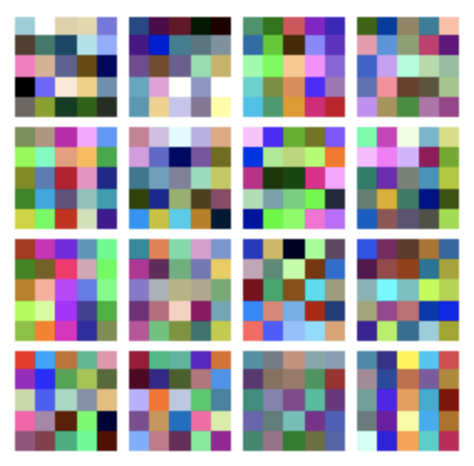

### (c) A Breakdown of The Parameters
- **self.conv_1 = nn.Conv2d(3, 16, 5)**  
  
  Parameters: 16 \* 3 \* 5 \* 5 = 1200
  
      
- **self.conv_2 = nn.Conv2d(16, 128, 5)** 
  
  Parameters: 128 \* 16 \* 5 \* 5 = 51200
  

- **self.linear = nn.Linear(3200, 64)**
  
  Parameters: 64 \* 3200 = 204800
  

- **self.predict = nn.Linear(64, num_outputs)**
  
  Parameters: 64 \* 10 = 640
  

- **The Overall Number**  
  
  Parameters: 257830
